# Preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("pollution.csv")

In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.columns = [x.lower() for x in df.columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   dewp    43824 non-null  int64  
 7   temp    43824 non-null  float64
 8   pres    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  iws     43824 non-null  float64
 11  is      43824 non-null  int64  
 12  ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [8]:
df.isna().sum()

no          0
year        0
month       0
day         0
hour        0
pm2.5    2067
dewp        0
temp        0
pres        0
cbwd        0
iws         0
is          0
ir          0
dtype: int64

In [14]:
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [21]:
df = df.dropna(axis=0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   dewp    41757 non-null  int64  
 7   temp    41757 non-null  float64
 8   pres    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  iws     41757 non-null  float64
 11  is      41757 non-null  int64  
 12  ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [24]:
df = df.reset_index(drop=True)

In [25]:
df.head()

,no,year,month,day,hour,pm2.5,dewp,temp,pres,cbwd,iws,is,ir
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [27]:
df.describe()

,no,year,month,day,hour,pm2.5,dewp,temp,pres,iws,is,ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


In [29]:
df = df.drop(columns=['no'])

In [30]:
df.head()

,year,month,day,hour,pm2.5,dewp,temp,pres,cbwd,iws,is,ir
0,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [32]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [33]:
df = df.drop(columns=['year', 'month', 'day'])

In [34]:
df.head()

,hour,pm2.5,dewp,temp,pres,cbwd,iws,is,ir,date
0,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02
1,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02
2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02
3,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02
4,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   hour    41757 non-null  int64         
 1   pm2.5   41757 non-null  float64       
 2   dewp    41757 non-null  int64         
 3   temp    41757 non-null  float64       
 4   pres    41757 non-null  float64       
 5   cbwd    41757 non-null  object        
 6   iws     41757 non-null  float64       
 7   is      41757 non-null  int64         
 8   ir      41757 non-null  int64         
 9   date    41757 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 3.2+ MB


In [50]:
df['cbwd'] = df['cbwd'].apply(lambda x: 'CV' if x == 'cv' else x)

In [51]:
df['cbwd'].unique()

array(['SE', 'CV', 'NW', 'NE'], dtype=object)

# Analysis

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

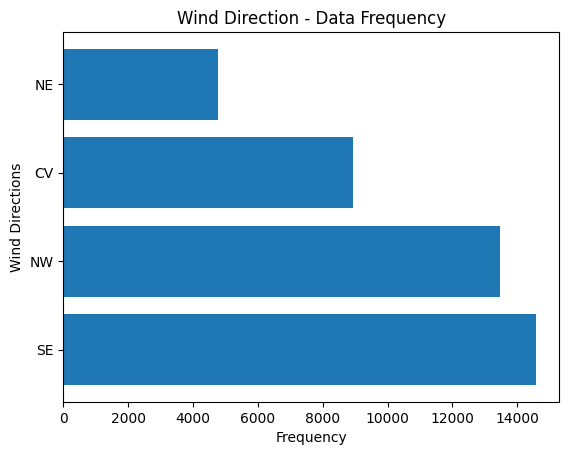

Number of Wind Direction 
cbwd
SE    14573
NW    13484
CV     8944
NE     4756
Name: count, dtype: int64


In [52]:
plt.barh(df["cbwd"].value_counts().index, df["cbwd"].value_counts())
plt.xlabel("Frequency")
plt.ylabel("Wind Directions")
plt.title("Wind Direction - Data Frequency")
plt.show()
print(f"Number of Wind Direction \n{df['cbwd'].value_counts()}")

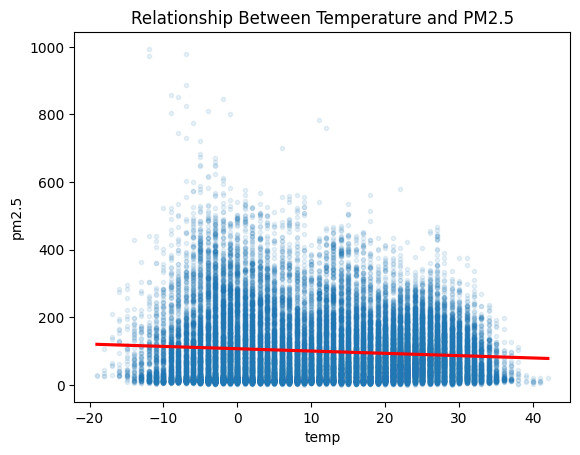

In [55]:
sns.regplot(x='temp', y='pm2.5', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and PM2.5')
plt.show()

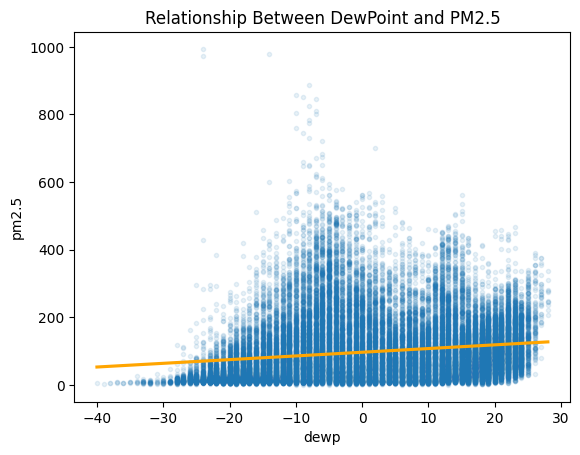

In [56]:
sns.regplot(x='dewp', y='pm2.5', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and PM2.5')
plt.show()

In [60]:
df.columns

Index(['hour', 'pm2.5', 'dewp', 'temp', 'pres', 'cbwd', 'iws', 'is', 'ir',
       'date'],
      dtype='object')

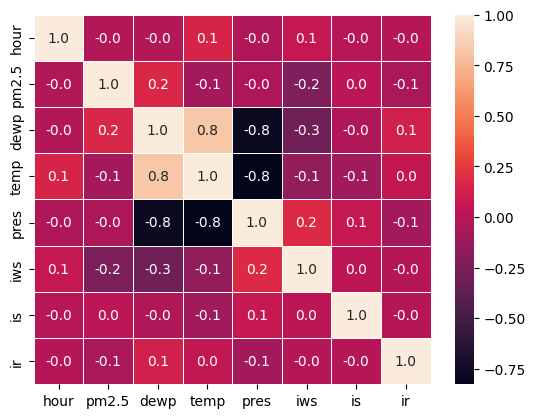

In [63]:
sns.heatmap(df[['hour', 'pm2.5', 'dewp', 'temp', 'pres', 'iws', 'is', 'ir']].corr(), annot=True, linewidths=0.5, fmt='.1f')
plt.show()

In [69]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [72]:
monthly_pm = df.groupby(['year', 'month'], as_index=False)['pm2.5'].mean()

C:\Users\tailw\DataWorks\Projects\Air Pollution\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tailw\DataWorks\Projects\Air Pollution\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tailw\DataWorks\Projects\Air Pollution\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


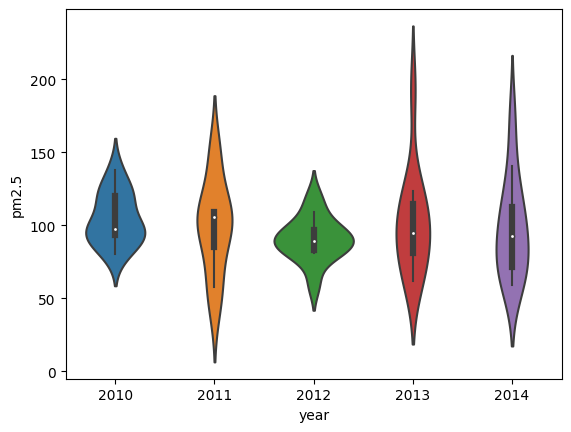

In [73]:
sns.violinplot(x="year", y="pm2.5", data=monthly_pm)
plt.show()

C:\Users\tailw\DataWorks\Projects\Air Pollution\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tailw\DataWorks\Projects\Air Pollution\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tailw\DataWorks\Projects\Air Pollution\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tailw\DataWorks\Projects\Air Pollution\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='year', ylabel='pm2.5'>

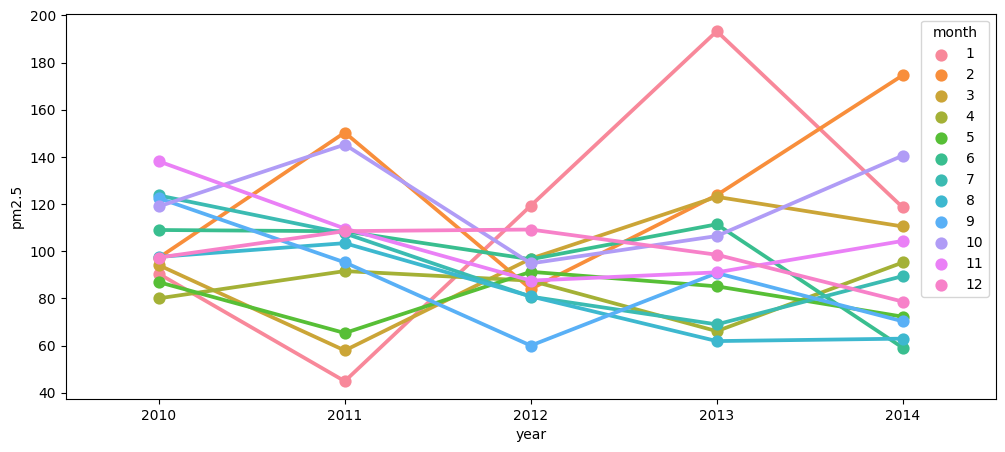

In [76]:
plt.figure(figsize=(12, 5))
sns.pointplot(x='year', y='pm2.5', data=monthly_pm, hue='month')

# Data Preperation for ML

In [87]:
df.drop(columns=['hour', 'date', 'month', 'year'], inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   41757 non-null  float64
 1   dewp    41757 non-null  int64  
 2   temp    41757 non-null  float64
 3   pres    41757 non-null  float64
 4   cbwd    41757 non-null  object 
 5   iws     41757 non-null  float64
 6   is      41757 non-null  int64  
 7   ir      41757 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.5+ MB


In [101]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

In [107]:
onehot = pd.get_dummies(df['cbwd'])

In [109]:
preprocessed_df = pd.concat([df, onehot], axis=1).drop(columns=['cbwd'])

In [110]:
preprocessed_df

,pm2.5,dewp,temp,pres,iws,is,ir,CV,NE,NW,SE
0,129.0,-16,-4.0,1020.0,1.79,0,0,False,False,False,True
1,148.0,-15,-4.0,1020.0,2.68,0,0,False,False,False,True
2,159.0,-11,-5.0,1021.0,3.57,0,0,False,False,False,True
3,181.0,-7,-5.0,1022.0,5.36,1,0,False,False,False,True
4,138.0,-7,-5.0,1022.0,6.25,2,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
41752,8.0,-23,-2.0,1034.0,231.97,0,0,False,False,True,False
41753,10.0,-22,-3.0,1034.0,237.78,0,0,False,False,True,False
41754,10.0,-22,-3.0,1034.0,242.70,0,0,False,False,True,False
41755,8.0,-22,-4.0,1034.0,246.72,0,0,False,False,True,False


In [116]:
X, y = preprocessed_df.iloc[:, 1:].values, preprocessed_df.iloc[:, 0].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Model Building

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [135]:
def get_model_summary(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predX = model.predict(X_train)
    print('train')
    print('\tr2 :', r2_score(y_train, predX))
    print('\trmse :', mean_squared_error(y_train, predX) ** 0.5)
    print('test')
    print('\tr2 :', r2_score(y_test, pred))
    print('\trmse :', mean_squared_error(y_test, pred) ** 0.5)

In [136]:
# linear model
get_model_summary(LinearRegression())

train
	r2 : 0.26313270914953046
	rmse : 78.79472449500744
test
	r2 : 0.25287161025013527
	rmse : 80.22860287103133


In [137]:
get_model_summary(KNeighborsRegressor())

train
	r2 : 0.5827451302762483
	rmse : 59.29297056050309
test
	r2 : 0.3663073839775379
	rmse : 73.88749330344525


In [138]:
get_model_summary(DecisionTreeRegressor())

train
	r2 : 0.9793218442646945
	rmse : 13.199528037774918
test
	r2 : -0.05601184674525861
	rmse : 95.38190780572181


In [139]:
get_model_summary(RandomForestRegressor())

train
	r2 : 0.9044356463363857
	rmse : 28.375953603106748
test
	r2 : 0.4213693948969659
	rmse : 70.60448833233703
